In [659]:
import numpy as np
import pandas as pd
import time, warnings
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from scipy import stats
from mpl_toolkits.mplot3d import Axes3D
from yellowbrick.cluster import KElbowVisualizer
import plotly.express as px
import plotly.graph_objects as go
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

**Dataset**

In [660]:
ecom=pd.read_csv("data.csv",header= 0,encoding='unicode_escape')

In [661]:
ecom.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [662]:
ecom.shape

(541909, 8)

In [663]:
print(ecom.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB
None


In [664]:
ecom.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [665]:
ecom.describe(include='object')

,InvoiceNo,StockCode,Description,InvoiceDate,Country
count,541909,541909,540455,541909,541909
unique,25900,4070,4223,23260,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,10/31/2011 14:41,United Kingdom
freq,1114,2313,2369,1114,495478


The dataset consists of 541,909 entries and 8 columns.

**InvoiceNo:** This is an object data type column that contains the invoice number for each transaction. Each invoice number can represent multiple items purchased in a single transaction.

**StockCode:** An object data type column that represnets the product code for each item.

**Description:** An object data type column, contains descriptions of the products. It has some missing values, with 540,455 non-null entries out of 541,909.

**Quantity:** This is an integer column indicating the quantity of products purchased in each transaction.

**InvoiceDate:** A datetime column that records the date and time of each transaction.

**UnitPrice:** A float column representing the unit price of each product.

**CustomerID:** A float column that contains the customer ID for each transaction. This column has a significant number of missing values, with only 406,829 non-null entries out of 541,909.

**Country:** An object column recording the country where each transaction took place

**Data Processing**

In [666]:
# Checking for null values in each column
null_values = ecom.isnull().sum()

# Displaying all null values
print("Null Values in Each Column:")
print(null_values)

Null Values in Each Column:
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


In [667]:
ecom[ecom['CustomerID'].isnull() | ecom['Description'].isnull()].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom


In [668]:
ecom.shape

(541909, 8)

**Data Cleaning**

In [669]:
# Filling missing values in the 'Description' column with a placeholder value 'Unknown'
ecom['Description'].fillna('Unknown', inplace=True)

# Assigning a placeholder ID (0.0) for records with missing CustomerID
ecom['CustomerID'].fillna(0.0, inplace=True)

# Checking if there are any remaining null values
null_values_after_processing = ecom.isnull().sum()

# Displaying null values after processing
print("Null Values in Each Column After Processing:")
print(null_values_after_processing)

# Displaying the first few rows of the processed dataset
print("Processed Dataset:")
print(ecom.head())

Null Values in Each Column After Processing:
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64
Processed Dataset:
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom  


In [670]:
# Converting 'InvoiceDate' to datetime format
ecom['InvoiceDate'] = pd.to_datetime(ecom['InvoiceDate'], format='%m/%d/%Y %H:%M')
ecom['CustomerID']= ecom.CustomerID.astype('int64')
# Verifying the data types after the conversion
print(ecom.dtypes)

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID              int64
Country                object
dtype: object


In [671]:
ecom.shape

(541909, 8)

**RFM Calculation**

**Recency** (R): Number of days since the customer's last purchase

**Frequency** (F): Total number of orders for each customer

**Monetary Value** (M): The total monetary value of a customer's purchases

In [672]:
# Convert 'InvoiceDate' to datetime format
ecom['InvoiceDate'] = pd.to_datetime(ecom['InvoiceDate'], format='%m/%d/%Y %H:%M')

# Calculating Recency (R): Number of days since the customer's last purchase
max_date = ecom['InvoiceDate'].max()
ecom['Recency'] = (max_date - ecom['InvoiceDate']).dt.days

# Calculating Frequency (F): Total number of orders for each customer
rfm_freq = ecom.groupby('CustomerID')['InvoiceNo'].count().reset_index()
rfm_freq.columns = ['CustomerID', 'Frequency']

# Calculating Monetary (M): The total monetary value of a customer's purchases
rfm_monetary = ecom.groupby('CustomerID')['UnitPrice'].sum().reset_index()
rfm_monetary.columns = ['CustomerID', 'Monetary']

# Merging Recency, Frequency, and Monetary dataframes
rfm_data = pd.merge(rfm_freq, rfm_monetary, on='CustomerID')

# Adding Recency to the RFM dataframe
rfm_data = pd.merge(rfm_data, ecom.groupby('CustomerID')['Recency'].min().reset_index(), on='CustomerID')

# Displaying the first few rows of the RFM dataframe
print("RFM Data:")
print(rfm_data.head())

RFM Data:
   CustomerID  Frequency    Monetary  Recency
0           0     135080  1090984.01        0
1       12346          2        2.08      325
2       12347        182      481.21        1
3       12348         31      178.71       74
4       12349         73      605.10       18


In [673]:
rfm_data.head(20)

,CustomerID,Frequency,Monetary,Recency
0,0,135080,1090984.01,0
1,12346,2,2.08,325
2,12347,182,481.21,1
3,12348,31,178.71,74
4,12349,73,605.10,18
5,12350,17,65.30,309
6,12352,95,2211.10,35
7,12353,4,24.30,203
8,12354,58,261.22,231
9,12355,13,54.65,213


**RFM Segmentation**

In [674]:
rfm_data["Recency_Score"] = pd.qcut(rfm_data["Recency"], 5, labels = [5, 4, 3, 2, 1])
rfm_data["Frequency_Score"] = pd.qcut(rfm_data["Frequency"].rank(method = "first"), 5, labels = [1, 2, 3, 4, 5])
rfm_data["Monetary_Score"] = pd.qcut(rfm_data["Monetary"], 5, labels = [1, 2, 3, 4, 5])

In [675]:
rfm_data['RFM_Score'] = rfm_data['Recency_Score'].astype(str) + rfm_data['Frequency_Score'].astype(str) + rfm_data['Monetary_Score'].astype(str)

# Displaying the first 20 rows of the RFM dataframe with scores
print("RFM Data with Scores:")
print(rfm_data.head(20))

RFM Data with Scores:
    CustomerID  Frequency    Monetary  Recency Recency_Score Frequency_Score  \
0            0     135080  1090984.01        0             5               5   
1        12346          2        2.08      325             1               1   
2        12347        182      481.21        1             5               5   
3        12348         31      178.71       74             2               3   
4        12349         73      605.10       18             4               4   
5        12350         17       65.30      309             1               2   
6        12352         95     2211.10       35             3               4   
7        12353          4       24.30      203             1               1   
8        12354         58      261.22      231             1               3   
9        12355         13       54.65      213             1               1   
10       12356         59      188.87       22             4               4   
11       12357    

In [676]:
rfm_data["RF_Score"] = rfm_data["Recency_Score"].astype(str) + rfm_data["Frequency_Score"].astype(str)
rfm_data.head(20)

,CustomerID,Frequency,Monetary,Recency,Recency_Score,Frequency_Score,Monetary_Score,RFM_Score,RF_Score
0,0,135080,1090984.01,0,5,5,5,555,55
1,12346,2,2.08,325,1,1,1,111,11
2,12347,182,481.21,1,5,5,5,555,55
3,12348,31,178.71,74,2,3,3,233,23
4,12349,73,605.10,18,4,4,5,445,44
5,12350,17,65.30,309,1,2,2,122,12
6,12352,95,2211.10,35,3,4,5,345,34
7,12353,4,24.30,203,1,1,1,111,11
8,12354,58,261.22,231,1,3,4,134,13
9,12355,13,54.65,213,1,1,2,112,11


In [677]:
# Seg_map is customer group.
seg_map = {
    r'[1-2][1-2]': 'Hibernating',
    r'[1-2][3-4]': 'At-Risk',
    r'[1-2]5': 'Cannot lose them',
    r'3[1-2]': 'About To Sleep',
    r'33': 'Need Attention',
    r'[3-4][4-5]': 'Loyal Customers',
    r'41': 'Promising',
    r'51': 'New Customers',
    r'[4-5][2-3]': 'Potential Loyalists',
    r'5[4-5]': 'Champions'
}
#segment using RF_Score and segmap.
rfm_data["segment"] = rfm_data["RF_Score"].replace(seg_map, regex = True)
# Last version of rfm_data dataframe.
rfm_data.head()

,CustomerID,Frequency,Monetary,Recency,Recency_Score,Frequency_Score,Monetary_Score,RFM_Score,RF_Score,segment
0,0,135080,1090984.01,0,5,5,5,555,55,Champions
1,12346,2,2.08,325,1,1,1,111,11,Hibernating
2,12347,182,481.21,1,5,5,5,555,55,Champions
3,12348,31,178.71,74,2,3,3,233,23,At-Risk
4,12349,73,605.10,18,4,4,5,445,44,Loyal Customers


In [678]:
rfm_data[["segment", "Recency", "Frequency", "Monetary"]].groupby("segment").agg(["mean", "sum", "count"])

Recency                 Frequency                \
                           mean     sum count        mean     sum count   
segment                                                                   
About To Sleep        51.233645   16446   321   15.797508    5071   321   
At-Risk              164.136752   96020   585   56.668376   33151   585   
Cannot lose them     140.250000   11781    84  183.142857   15384    84   
Champions              4.277686    2588   605  512.872727  310288   605   
Hibernating          210.959662  224883  1066   13.360225   14242  1066   
Loyal Customers       31.276520   26241   839  162.561383  136389   839   
Need Attention        50.242574   10149   202   41.693069    8422   202   
New Customers          5.689655     330    58    7.517241     436    58   
Potential Loyalists   14.547573    7492   515   34.617476   17828   515   
Promising             21.714286    2128    98    7.122449     698    98   

                        Monetary                     
                            mean          sum count  
segment                                              
About To Sleep         75.279221    24164.630   321  
At-Risk               185.713402   108642.340   585  
Cannot lose them      596.660488    50119.481    84  
Champions            2743.059736  1659551.140   605  
Hibernating           100.870086   107527.512  1066  
Loyal Customers       546.386496   458418.270   839  
Need Attention        126.066688    25465.471   202  
New Customers          29.753621     1725.710    58  
Potential Loyalists   117.002175    60256.120   515  
Promising              29.931633     2933.300    98

In [679]:
rfm_data.head(20)

,CustomerID,Frequency,Monetary,Recency,Recency_Score,Frequency_Score,Monetary_Score,RFM_Score,RF_Score,segment
0,0,135080,1090984.01,0,5,5,5,555,55,Champions
1,12346,2,2.08,325,1,1,1,111,11,Hibernating
2,12347,182,481.21,1,5,5,5,555,55,Champions
3,12348,31,178.71,74,2,3,3,233,23,At-Risk
4,12349,73,605.10,18,4,4,5,445,44,Loyal Customers
5,12350,17,65.30,309,1,2,2,122,12,Hibernating
6,12352,95,2211.10,35,3,4,5,345,34,Loyal Customers
7,12353,4,24.30,203,1,1,1,111,11,Hibernating
8,12354,58,261.22,231,1,3,4,134,13,At-Risk
9,12355,13,54.65,213,1,1,2,112,11,Hibernating


In [680]:
rfm_coordinates = {"Champions": [3, 5, 0.8, 1],
                   "Loyal Customers": [3, 5, 0.4, 0.8],
                   "Cannot lose them": [4, 5, 0, 0.4],
                   "At-Risk": [2, 4, 0, 0.4],
                   "Hibernating": [0, 2, 0, 0.4],
                   "About To Sleep": [0, 2, 0.4, 0.6],
                   "Promising": [0, 1, 0.6, 0.8],
                   "New Customers": [0, 1, 0.8, 1],
                   "Potential Loyalists": [1, 3, 0.6, 1],
                   "Need Attention": [2, 3, 0.4, 0.6]}

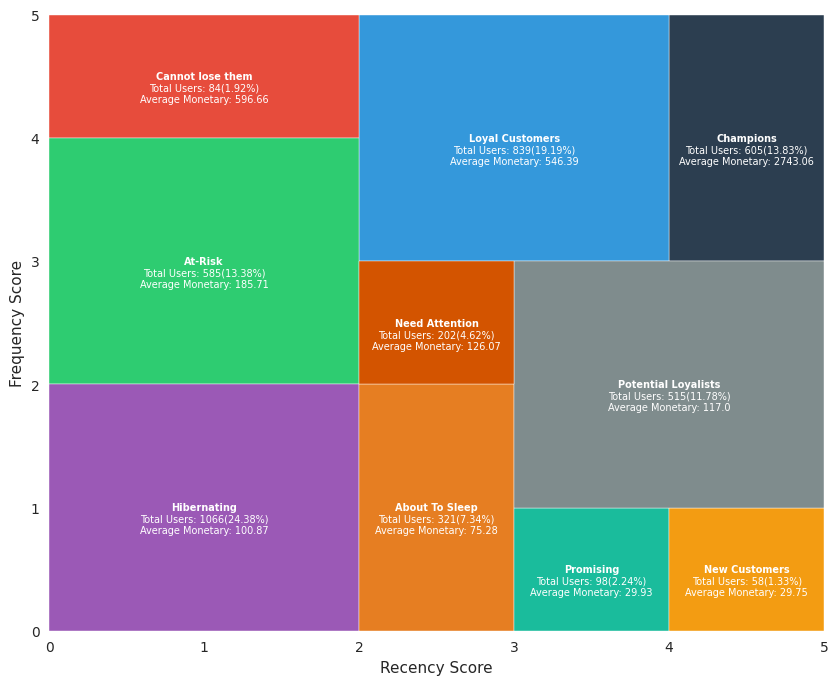

In [681]:
fig, ax = plt.subplots(figsize = (10,8))

ax.set_xlim([0, 5])
ax.set_ylim([0, 5])

plt.rcParams["axes.facecolor"] = "white"
palette = ["#2C3E50", "#3498DB", "#E74C3C", "#2ECC71", "#9B59B6",
           "#E67E22", "#1ABC9C", "#F39C12", "#7F8C8D", "#D35400"]

for key, color in zip(rfm_coordinates.keys(), palette[:10]):

    coordinates = rfm_coordinates[key]
    ymin, ymax, xmin, xmax = coordinates[0], coordinates[1], coordinates[2], coordinates[3]

    ax.axhspan(ymin = ymin, ymax = ymax, xmin = xmin, xmax = xmax, facecolor = color)

    users = rfm_data[rfm_data.segment == key].shape[0]
    users_percentage = (rfm_data[rfm_data.segment == key].shape[0] / rfm_data.shape[0]) * 100
    avg_monetary = rfm_data[rfm_data.segment == key]["Monetary"].mean()

    user_txt = "\n\nTotal Users: " + str(users) + "(" +  str(round(users_percentage, 2)) + "%)"
    monetary_txt = "\n\n\n\nAverage Monetary: " + str(round(avg_monetary, 2))

    x = 5 * (xmin + xmax) / 2
    y = (ymin + ymax) / 2

    plt.text(x = x, y = y, s = key, ha = "center", va = "center", fontsize = 7, color = "white", fontweight = "bold")
    plt.text(x = x, y = y, s = user_txt, ha = "center", va = "center", fontsize = 7, color = "white")
    plt.text(x = x, y = y, s = monetary_txt, ha = "center", va = "center", fontsize = 7, color = "white")

    ax.set_xlabel("Recency Score")
    ax.set_ylabel("Frequency Score")

sns.despine(left = True, bottom = True)
plt.show()

In [682]:
top10 = rfm_data['segment'].value_counts()[:10]
fig = px.bar(y=top10.values,
             x=top10.index,
             text_auto=True,
             color = top10.index,
             title= 'RFM',
            template= 'ggplot2' )

fig.show()

Hibernating: Customers who used to purchase frequently but haven't in a while. They are inactive.

At Risk: Customers who are at the risk of becoming inactive. They used to purchase, but the frequency has decreased.

Can't Loose: Customers who have made only one or two purchases and are unlikely to return.

About to Sleep: Customers who used to purchase but haven't in a while and are likely to become inactive.

Need Attention: Customers who are not frequent buyers and need attention to keep them engaged.

Loyal Customers: Customers who are consistently making purchases and are loyal to the company.

Promising: Customers who have made a few purchases and show potential for becoming loyal.

New Customers: Recently acquired customers who are in the early stages of their relationship with the company.

Potential Loyalists: Customers who have made purchases in the past and show potential for becoming loyal.

Champions: Highly valuable customers who make frequent purchases and are loyal to the company.

**Customer Segmentation using Clustering (K-Means)**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

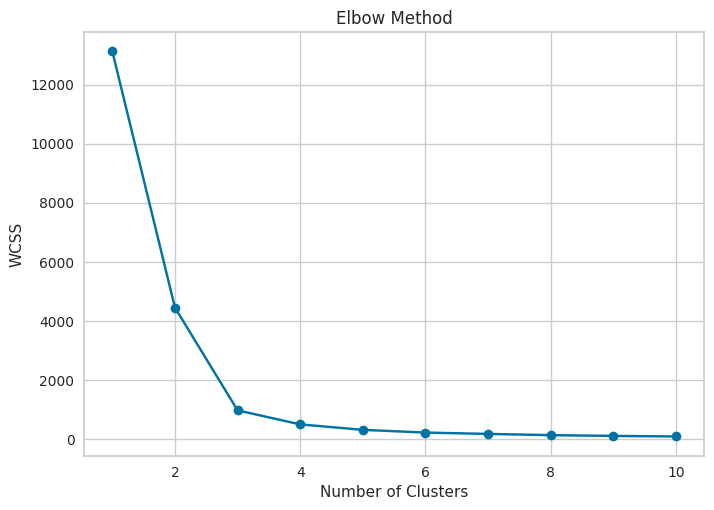

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [683]:
# Task 4: Customer Segmentation using K-Means clustering
# Select RFM variables for clustering
X = rfm_data[['Recency', 'Frequency', 'Monetary']]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Find the optimal number of clusters (you can experiment with different values)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the elbow method to determine the optimal number of clusters
import matplotlib.pyplot as plt
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')  # WCSS stands for 'Within-Cluster Sum of Squares'
plt.show()

# Determine the optimal number of clusters based on the elbow method
optimal_number_of_clusters = 3# Choose the optimal number based on the plot

# Based on the elbow method, choose the optimal number of clusters and fit the K-Means model
kmeans = KMeans(n_clusters=optimal_number_of_clusters, init='k-means++', random_state=42)
rfm_data['Cluster'] = kmeans.fit_predict(X_scaled)

In [684]:
ecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  541909 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   541909 non-null  int64         
 7   Country      541909 non-null  object        
 8   Recency      541909 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(4)
memory usage: 37.2+ MB


In [685]:
ecom["TotalPrice"] = ecom["Quantity"]*ecom["UnitPrice"]
f = ecom[(np.abs(stats.zscore(ecom[["TotalPrice"]])) < 3).all(axis=1)]

In [686]:
import datetime as dt
today_date = dt.datetime(2023, 11, 1)

In [687]:
df_clustering = ecom.groupby('CustomerID').agg({'InvoiceDate': lambda InvoiceDate: (today_date - InvoiceDate.max()).days,
                                                 'InvoiceNo'    : 'nunique',
                                                 'TotalPrice' : 'sum'})

df_clustering.columns = ['recency', 'frequency', 'monetary']
std_scaler = StandardScaler()
df_scaled = std_scaler.fit_transform(df_clustering)
df_scaled = pd.DataFrame(df_scaled,columns=['recency', 'frequency', 'monetary'])
df_scaled["CustomerID"] = df_clustering.index
df_scaled = df_scaled.set_index("CustomerID",drop=True)

To determine the optimal number of clusters elbow method is used

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

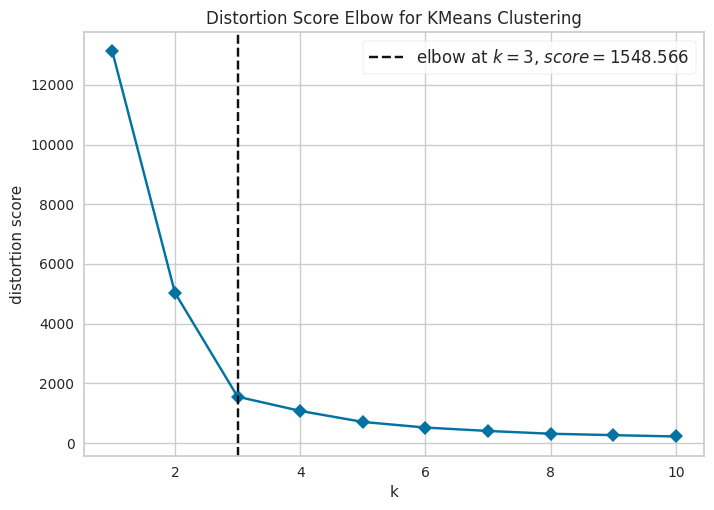

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [688]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,11), timings= False)
visualizer.fit(df_scaled)
visualizer.show()

In [689]:
# Based on the Elbow Method, we are choosing the optimal number of clusters as 3
optimal_k =  3

scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(X)


# Performing K-Means clustering
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
rfm_data['Cluster'] = kmeans.fit_predict(rfm_scaled)

# Displaying the first few rows of the RFM dataframe with clusters
print("RFM Data with Clusters:")
print(rfm_data.head())

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



RFM Data with Clusters:
   CustomerID  Frequency    Monetary  Recency Recency_Score Frequency_Score  \
0           0     135080  1090984.01        0             5               5   
1       12346          2        2.08      325             1               1   
2       12347        182      481.21        1             5               5   
3       12348         31      178.71       74             2               3   
4       12349         73      605.10       18             4               4   

  Monetary_Score RFM_Score RF_Score          segment  Cluster  
0              5       555       55        Champions        1  
1              1       111       11      Hibernating        2  
2              5       555       55        Champions        0  
3              3       233       23          At-Risk        0  
4              5       445       44  Loyal Customers        0  


We select the Recency, Frequency, and Monetary features for
segmentation.

The data is standardized using the StandardScaler to ensure that all features have the same scale.

The Elbow Method is used to determine the optimal number of clusters. You can visually inspect the graph to find the "elbow" point where the within-cluster sum of squares (WCSS) starts to decrease at a slower rate.

Based on the Elbow Method, we choose the optimal number of clusters (you may need to adjust this based on your visual inspection).

Finally, we perform K-Means clustering and add the 'Cluster' column to the RFM dataframe.

**Segment Profiling**

In [690]:
segment_profiles = rfm_data.groupby('segment').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'CustomerID': 'count'
}).rename(columns={'CustomerID': 'Customer Count'})

# Printing the segment profiles
print(segment_profiles)

                        Recency   Frequency     Monetary  Customer Count
segment                                                                 
About To Sleep        51.233645   15.797508    75.279221             321
At-Risk              164.136752   56.668376   185.713402             585
Cannot lose them     140.250000  183.142857   596.660488              84
Champions              4.277686  512.872727  2743.059736             605
Hibernating          210.959662   13.360225   100.870086            1066
Loyal Customers       31.276520  162.561383   546.386496             839
Need Attention        50.242574   41.693069   126.066688             202
New Customers          5.689655    7.517241    29.753621              58
Potential Loyalists   14.547573   34.617476   117.002175             515
Promising             21.714286    7.122449    29.931633              98


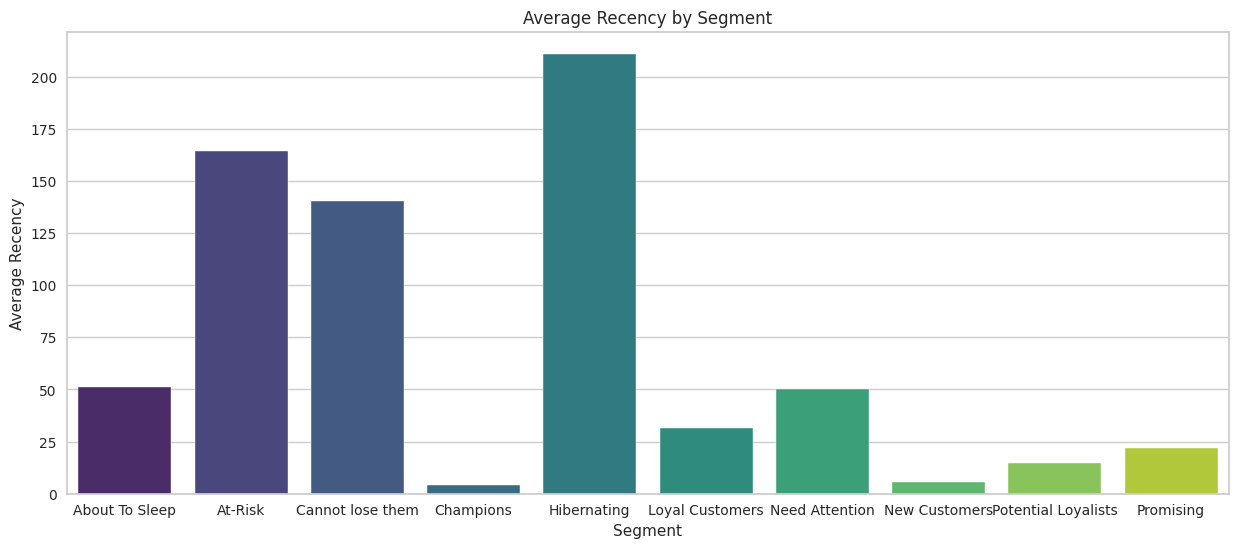

In [691]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the segment profiles
plt.figure(figsize=(15,6))
sns.barplot(x=segment_profiles.index, y='Recency', data=segment_profiles, palette='viridis')
plt.title('Average Recency by Segment')
plt.xlabel('Segment')
plt.ylabel('Average Recency')
plt.show()

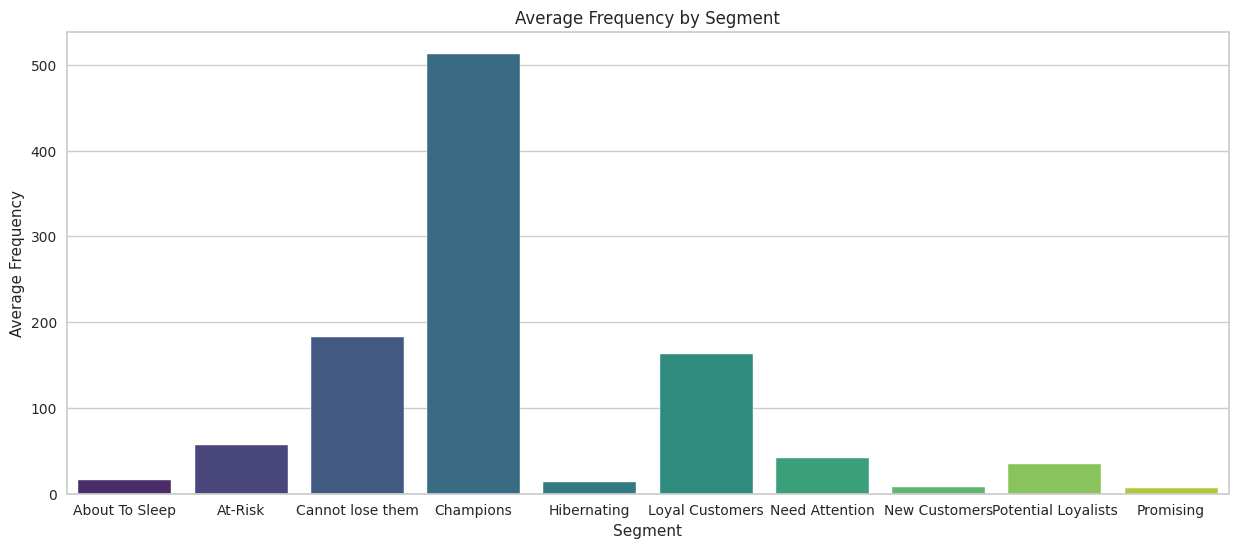

In [692]:
plt.figure(figsize=(15,6))
sns.barplot(x=segment_profiles.index, y='Frequency', data=segment_profiles, palette='viridis')
plt.title('Average Frequency by Segment')
plt.xlabel('Segment')
plt.ylabel('Average Frequency')
plt.show()

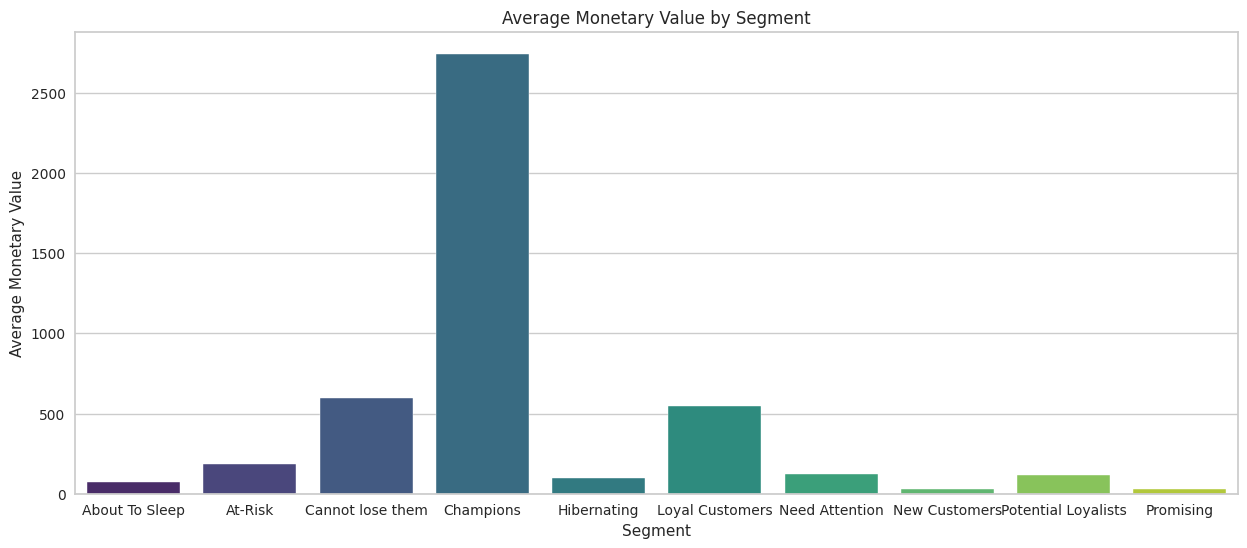

In [693]:
plt.figure(figsize=(15,6))
sns.barplot(x=segment_profiles.index, y='Monetary', data=segment_profiles, palette='viridis')
plt.title('Average Monetary Value by Segment')
plt.xlabel('Segment')
plt.ylabel('Average Monetary Value')
plt.show()

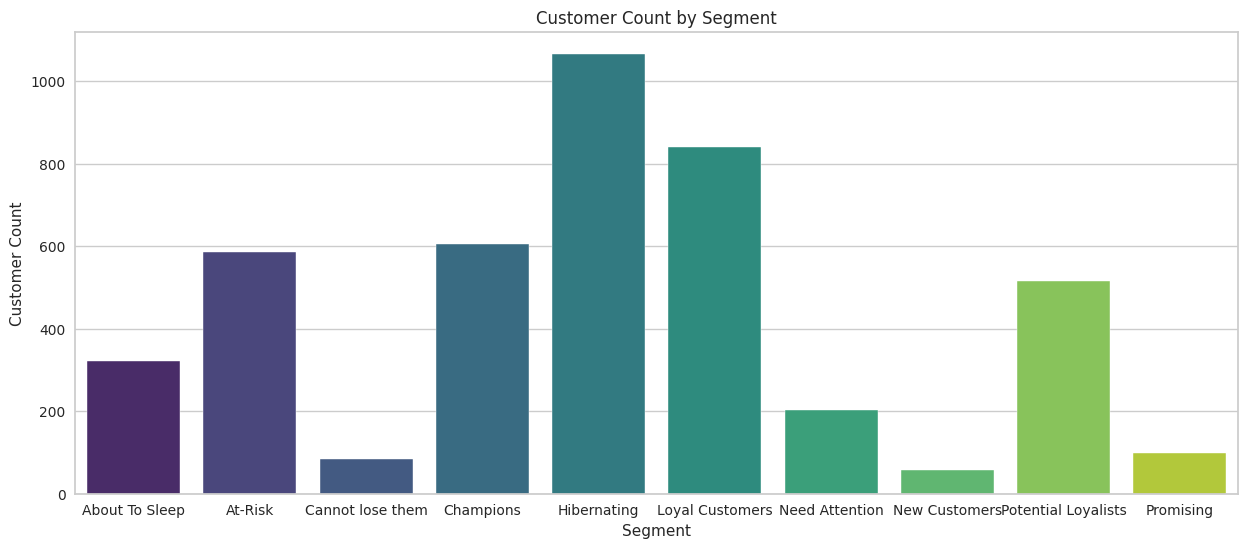

In [694]:
plt.figure(figsize=(15, 6))
sns.barplot(x=segment_profiles.index, y='Customer Count', data=segment_profiles, palette='viridis')
plt.title('Customer Count by Segment')
plt.xlabel('Segment')
plt.ylabel('Customer Count')
plt.show()

Segment Profiles:
         Average Recency  Average Frequency  Average Monetary  \
Cluster                                                         
0              39.544073         113.976596      3.792625e+02   
1               0.000000      135080.000000      1.090984e+06   
2             247.650647          29.432532      1.479171e+02   

         Number of Customers  
Cluster                       
0                       3290  
1                          1  
2                       1082  


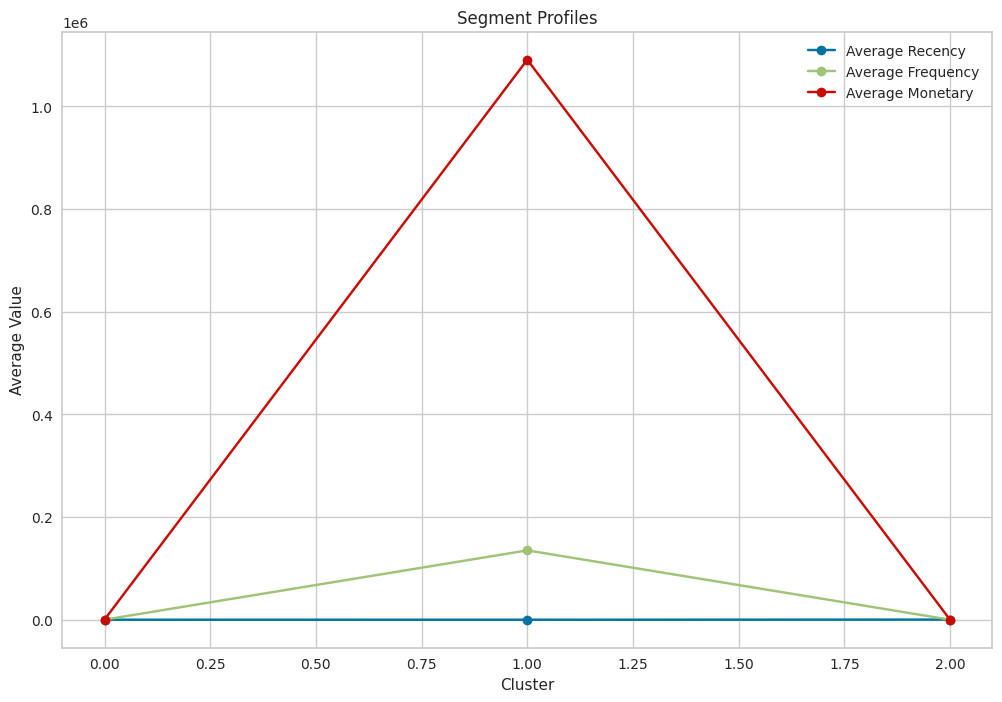

In [695]:
# Analyzing and profiling each customer segment
segment_profiles = rfm_data.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'CustomerID': 'count'
}).rename(columns={'Recency': 'Average Recency', 'Frequency': 'Average Frequency', 'Monetary': 'Average Monetary', 'CustomerID': 'Number of Customers'})

# Displaying segment profiles
print("Segment Profiles:")
print(segment_profiles)

# Visualizing the segments using line plots
plt.figure(figsize=(12, 8))
plt.plot(segment_profiles.index, segment_profiles['Average Recency'], label='Average Recency', marker='o')
plt.plot(segment_profiles.index, segment_profiles['Average Frequency'], label='Average Frequency', marker='o')
plt.plot(segment_profiles.index, segment_profiles['Average Monetary'], label='Average Monetary', marker='o')

plt.title('Segment Profiles')
plt.xlabel('Cluster')
plt.ylabel('Average Value')
plt.legend()
plt.show()


The segment profiling using line plots can reveal trends and patterns in the average values of Recency, Frequency, and Monetary metrics across different customer segments. Here's what you might learn from the line plots:

**Recency:**

The line plot for average recency across segments will show whether
certain segments tend to have more recent purchases than others. A rising trend may indicate increasing recency, while a declining trend may suggest a decrease in recency. This information helps identify segments that may require re-engagement strategies.

**Frequency:**

The line plot for average frequency will highlight how often customers in each segment make purchases. A segment with a rising trend in frequency may indicate increasing customer loyalty, while a declining trend might signal a need for strategies to boost repeat purchases.

**Monetary:**

The line plot for average monetary values will reveal the spending patterns of different segments. A rising trend in monetary values could indicate increasing customer spending, while a declining trend might suggest a decrease in average transaction values. This information is valuable for understanding the revenue potential of each segment.

**Comparisons Between Segments:**

By visualizing the lines for each metric across segments, you can easily compare the performance of different customer segments. For example, you can identify segments that consistently show higher recency, frequency, or monetary values compared to others.

**Identification of High-Performing Segments:**

Segments with consistently high values for recency, frequency, and monetary metrics may stand out. These could be considered high-performing segments that warrant special attention and targeted marketing strategies.

**Marketing Recommendations**

In [696]:
segment_data = {
    'Hibernating': rfm_data[rfm_data['segment'] == 'Hibernating'],
    'At-Risk': rfm_data[rfm_data['segment'] == 'At-Risk'],
    'Cannot Lose Them': rfm_data[rfm_data['segment'] == 'Cannot Lose Them'],
    'About To Sleep': rfm_data[rfm_data['segment'] == 'About To Sleep'],
    'Need Attention': rfm_data[rfm_data['segment'] == 'Need Attention'],
    'Loyal Customers': rfm_data[rfm_data['segment'] == 'Loyal Customers'],
    'Promising': rfm_data[rfm_data['segment'] == 'Promising'],
    'New Customers': rfm_data[rfm_data['segment'] == 'New Customers'],
    'Potential Loyalists': rfm_data[rfm_data['segment'] == 'Potential Loyalists'],
    'Champions': rfm_data[rfm_data['segment'] == 'Champions'],
}

# Marketing Recommendations
for segment, data in segment_data.items():
    if not data.empty:
        if segment == 'Hibernating':
            # Recommendation: Re-Engagement Campaigns
            # Strategy: Implement re-engagement emails with personalized offers
            print(f"Implement re-engagement emails with personalized offers for \033[1m{segment}!\033[0m.")
            print("-------------------------------------------------------------------------")

        elif segment == 'At-Risk':
            # Recommendation: Loyalty Program
            # Strategy: Implement a loyalty program to incentivize repeat purchases
            print(f"Implement a loyalty program to incentivize repeat purchases for \033[1m{segment}!\033[0m.")
            print("-------------------------------------------------------------------------")


        elif segment == 'Cannot Lose Them':
            # Recommendation: VIP Treatment
            # Strategy: Create an exclusive VIP program with premium benefits
            print(f"Create an exclusive VIP program with premium benefits for \033[1m{segment}!\033[0m.")
            print("-------------------------------------------------------------------------")

        elif segment == 'About To Sleep':
            # Recommendation: Re-Engagement Offers
            # Strategy: Send targeted offers to re-engage customers
            print(f"Send targeted offers to re-engage customers in \033[1m{segment}!\033[0m.")
            print("-------------------------------------------------------------------------")

        elif segment == 'Need Attention':
            # Recommendation: Personalized Content
            # Strategy: Send personalized content based on past preferences
            print(f"Send personalized content based on past preferences to customers in \033[1m{segment}!\033[0m.")
            print("-------------------------------------------------------------------------")

        elif segment == 'Loyal Customers':
            # Recommendation: Exclusive Perks
            # Strategy: Offer exclusive perks for loyalty
            print(f"Offer exclusive perks for loyalty to \033[1m{segment}!\033[0m.")
            print("-------------------------------------------------------------------------")

        elif segment == 'Promising':
            # Recommendation: Nurturing Campaigns
            # Strategy: Develop nurturing campaigns to educate about products
            print(f"Develop nurturing campaigns to educate about products for \033[1m{segment}!\033[0m.")
            print("-------------------------------------------------------------------------")

        elif segment == 'New Customers':
            # Recommendation: Onboarding Program
            # Strategy: Implement an onboarding program for new customers
            print(f"Implement an onboarding program for new customers in \033[1m{segment}!\033[0m.")
            print("-------------------------------------------------------------------------")

        elif segment == 'Potential Loyalists':
            # Recommendation: Tiered Rewards
            # Strategy: Introduce tiered rewards based on spending levels
            print(f"Introduce tiered rewards based on spending levels for \033[1m{segment}!\033[0m.")
            print("-------------------------------------------------------------------------")

        elif segment == 'Champions':
            # Recommendation: Referral Programs
            # Strategy: Implement a referral program to capitalize on loyalty
            print(f"Implement a referral program to capitalize on loyalty for \033[1m{segment}!\033[0m.")
            print("-------------------------------------------------------------------------")


Implement re-engagement emails with personalized offers for Hibernating!.
-------------------------------------------------------------------------
Implement a loyalty program to incentivize repeat purchases for At-Risk!.
-------------------------------------------------------------------------
Send targeted offers to re-engage customers in About To Sleep!.
-------------------------------------------------------------------------
Send personalized content based on past preferences to customers in Need Attention!.
-------------------------------------------------------------------------
Offer exclusive perks for loyalty to Loyal Customers!.
-------------------------------------------------------------------------
Develop nurturing campaigns to educate about products for Promising!.
-------------------------------------------------------------------------
Implement an onboarding program for new customers in New Customers!.
-----------------------------------------------------------------

We identify key characteristics of each segment by filtering the RFM data based on the cluster labels.


The marketing_recommendations function provides specific recommendations for each segment. Adjust these recommendations based on your business context and the insights gained from the segment profiling.

**Visualization**

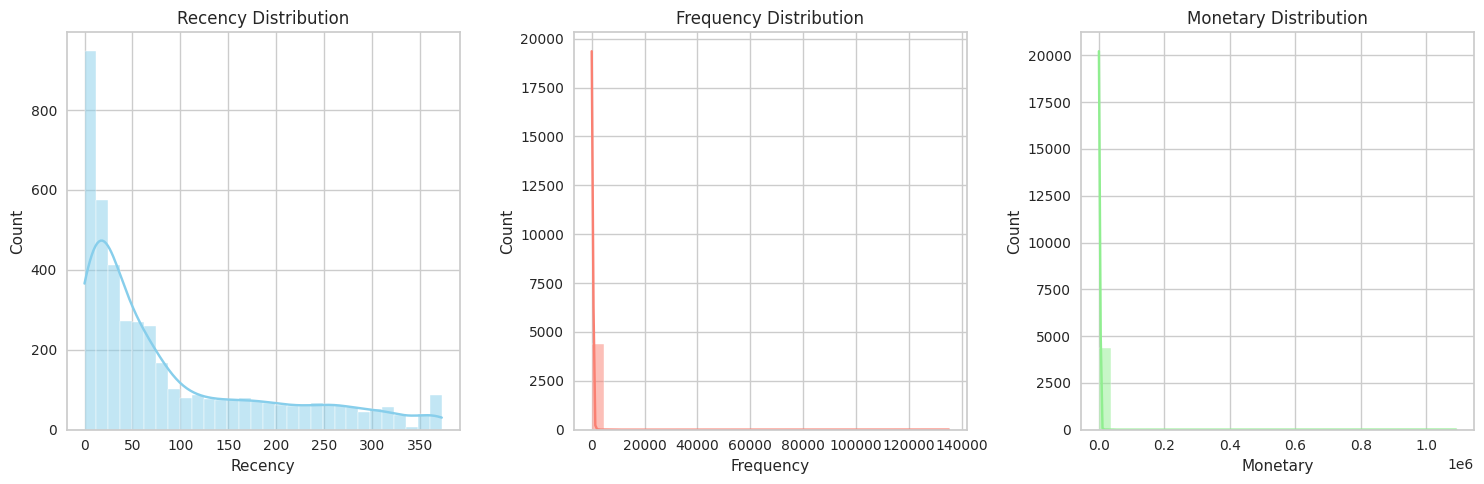

In [697]:
# Visualization 1: RFM Distribution
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(rfm_data['Recency'], bins=30, kde=True, color='skyblue')
plt.title('Recency Distribution')

plt.subplot(1, 3, 2)
sns.histplot(rfm_data['Frequency'], bins=30, kde=True, color='salmon')
plt.title('Frequency Distribution')

plt.subplot(1, 3, 3)
sns.histplot(rfm_data['Monetary'], bins=30, kde=True, color='lightgreen')
plt.title('Monetary Distribution')

plt.tight_layout()
plt.show()

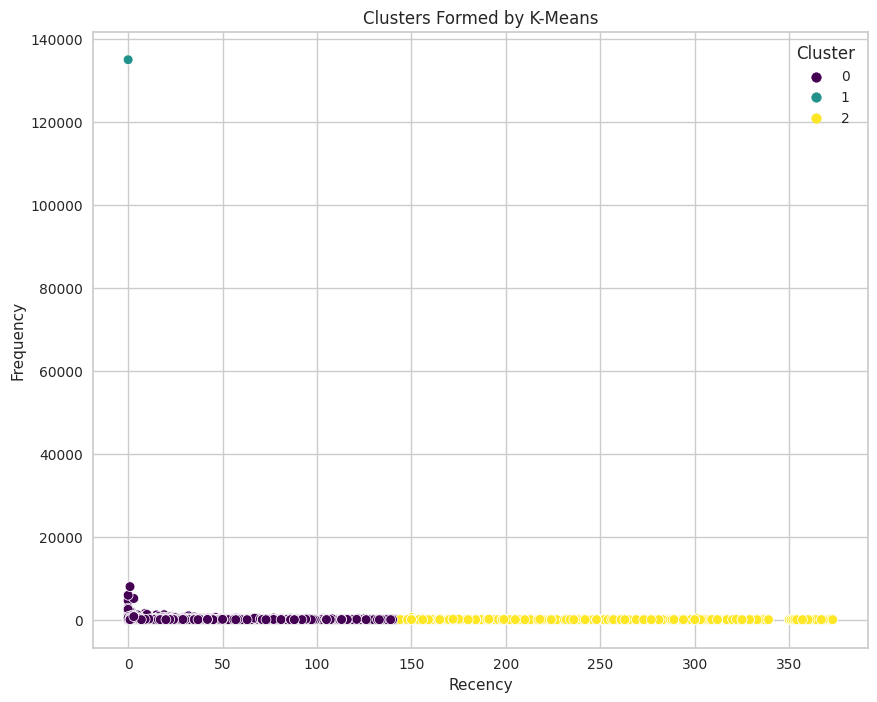

In [698]:
# Visualization 2: Clusters formed by K-Means
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Recency', y='Frequency', hue='Cluster', data=rfm_data, palette='viridis', s=50)
plt.title('Clusters Formed by K-Means')
plt.xlabel('Recency')
plt.ylabel('Frequency')
plt.show()

The first set of visualizations illustrates the distribution of Recency, Frequency, and Monetary metrics using histograms. This helps in understanding the overall distribution of these metrics in the dataset.

The second visualization uses a scatter plot to show the clusters formed byK-Means. The x-axis represents Recency, the y-axis represents Frequency, and each point is colored according to its assigned cluster.

# Data Overview

Question 1: What is the size of the dataset in terms of the number of rows and columns?

In [699]:
# Displaying the shape of the dataset
ecom_data=pd.read_csv("data.csv",header= 0,encoding='unicode_escape')
dataset_shape = ecom_data.shape
print("Dataset Size (Rows, Columns):", dataset_shape)

Dataset Size (Rows, Columns): (541909, 8)


Question 2: Can you provide a brief description of each column in the dataset?

In [700]:
# Displaying column information
column_info = ecom_data.info()
print(column_info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB
None


Question 3: What is the time period covered by this dataset?

In [701]:
# Displaying the time range covered by the dataset
time_period = ecom_data['InvoiceDate'].min(), ecom_data['InvoiceDate'].max()
print("Time Period Covered:", time_period)

Time Period Covered: ('1/10/2011 10:04', '9/9/2011 9:52')


# Customer Analysis

Question 1: How many unique customers are there in the dataset?

In [702]:
# Counting the number of unique customers
unique_customers = ecom['CustomerID'].nunique()
print("Number of Unique Customers:", unique_customers)

Number of Unique Customers: 4373


Question 2: What is the distribution of the number of orders per customer?

In [703]:
# Calculating the distribution of orders per customer
orders_per_customer = ecom.groupby('CustomerID')['InvoiceNo'].nunique()
print("Distribution of Orders per Customer:")
print(orders_per_customer.describe())

Distribution of Orders per Customer:
count    4373.000000
mean        5.922708
std        56.798813
min         1.000000
25%         1.000000
50%         3.000000
75%         5.000000
max      3710.000000
Name: InvoiceNo, dtype: float64


Question 3: Can you identify the top 5 customers who have made the most purchases by order count?

In [704]:
# Identifying the top 5 customers by order count
top_customers = orders_per_customer.sort_values(ascending=False).head(6)
print("Top 5 Customers by Order Count:")
print(top_customers)

Top 5 Customers by Order Count:
CustomerID
0        3710
14911     248
12748     224
17841     169
14606     128
15311     118
Name: InvoiceNo, dtype: int64


Top 5 Customers by Order Count
CustomerID
14911    248
12748    224
17841    169
14606    128
15311    118
Name: InvoiceNo, dtype: int64


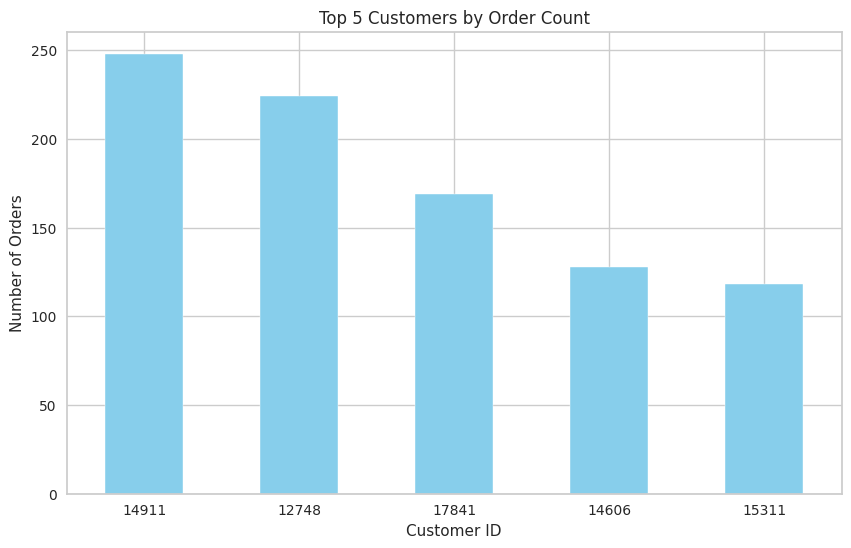

In [705]:
# Identifying the top 5 customers by order count
top_customers = orders_per_customer.sort_values(ascending=False).head(6)

selected_rows = top_customers.iloc[1:6]
print("Top 5 Customers by Order Count")
print(selected_rows)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
selected_rows.plot(kind='bar', color='skyblue')
plt.title('Top 5 Customers by Order Count')
plt.xlabel('Customer ID')
plt.ylabel('Number of Orders')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.show()

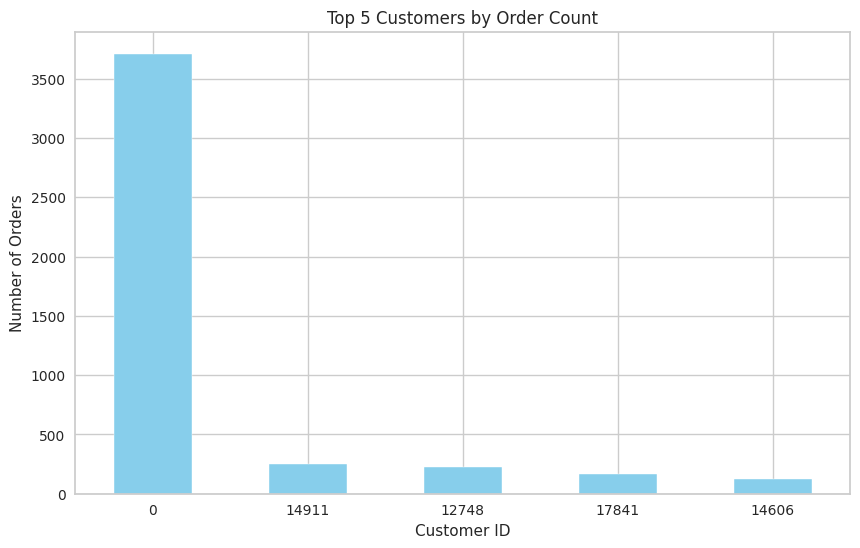

In [706]:
top_customers = orders_per_customer.sort_values(ascending=False).head(5)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
top_customers.plot(kind='bar', color='skyblue')
plt.title('Top 5 Customers by Order Count')
plt.xlabel('Customer ID')
plt.ylabel('Number of Orders')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.show()

# Product Analysis

Question 1: What are the top 10 most frequently purchased products?

In [707]:
# Identifying the top 10 most frequently purchased products
top_products = ecom['Description'].value_counts().head(10)
print("Top 10 Most Frequently Purchased Products:")
print(top_products)

Top 10 Most Frequently Purchased Products:
WHITE HANGING HEART T-LIGHT HOLDER    2369
REGENCY CAKESTAND 3 TIER              2200
JUMBO BAG RED RETROSPOT               2159
PARTY BUNTING                         1727
LUNCH BAG RED RETROSPOT               1638
ASSORTED COLOUR BIRD ORNAMENT         1501
SET OF 3 CAKE TINS PANTRY DESIGN      1473
Unknown                               1454
PACK OF 72 RETROSPOT CAKE CASES       1385
LUNCH BAG  BLACK SKULL.               1350
Name: Description, dtype: int64


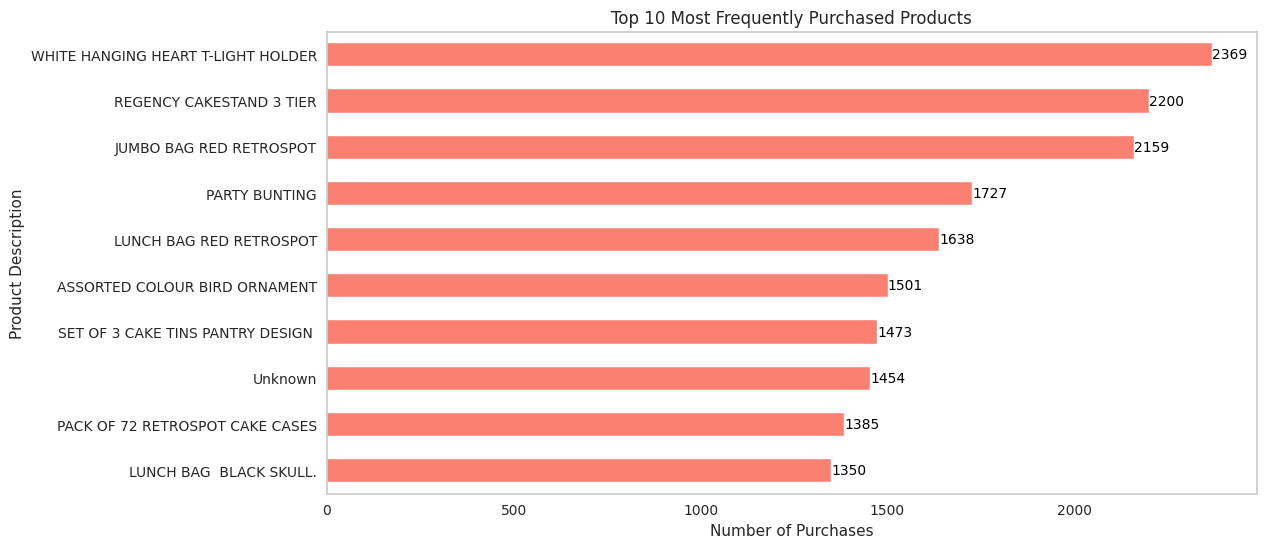

In [708]:
top_products = ecom['Description'].value_counts().head(10)
plt.figure(figsize=(12, 6))
bar_plot = top_products.sort_values().plot(kind='barh', color='salmon')
plt.title('Top 10 Most Frequently Purchased Products')
plt.xlabel('Number of Purchases')
plt.ylabel('Product Description')

# Adding count labels on the bars
for index, value in enumerate(top_products.sort_values()):
    plt.text(value, index, str(value), ha='left', va='center', fontsize=10, color='black')
plt.grid(False)
plt.show()

Question 2: What is the average price of products in the dataset?

In [709]:
# Calculating the average price of products with 2 decimal points
average_price = round(ecom['UnitPrice'].mean(), 2)
print("Average Price of Products:", average_price)

Average Price of Products: 4.61


Question 3: Can you find out which product category generates the highest revenue?

In [710]:
# Calculating revenue for each product (Description) by multiplying Quantity and UnitPrice
ecom['Revenue'] = ecom['Quantity'] * ecom['UnitPrice']

# Identifying the product category with the highest revenue
highest_revenue_category = ecom.groupby('Description')['Revenue'].sum().idxmax()
print("Product Category with the Highest Revenue:", highest_revenue_category)


Product Category with the Highest Revenue: DOTCOM POSTAGE


# Time Analysis

Question 1: Is there a specific day of the week or time of day when most orders are placed?

In [711]:
# Extracting day of the week and hour from the InvoiceDate
ecom['DayOfWeek'] = ecom['InvoiceDate'].dt.day_name()
ecom['HourOfDay'] = ecom['InvoiceDate'].dt.hour

# Identifying the most common day of the week and time of day for orders
most_common_day = ecom['DayOfWeek'].mode().values[0]
most_common_hour = ecom['HourOfDay'].mode().values[0]

print("Most Common Day of the Week for Orders:", most_common_day)
print("Most Common Hour of the Day for Orders:", most_common_hour)


Most Common Day of the Week for Orders: Thursday
Most Common Hour of the Day for Orders: 12


Question 2: What is the average order processing time?

In [712]:
# Calculating order processing time in hours
ecom['OrderProcessingTime'] = (ecom['InvoiceDate'] - ecom['InvoiceDate'].min()).dt.total_seconds() / 3600

# Calculating the average order processing time
average_processing_time = ecom['OrderProcessingTime'].mean()
print("Average Order Processing Time (hours):", round(average_processing_time, 2))


Average Order Processing Time (hours): 5165.15


This code calculates the order processing time in hours and provides the average order processing time with two decimal points.

Question 3: Are there any seasonal trends in the dataset?

<ipython-input-713-c75694a7e387>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



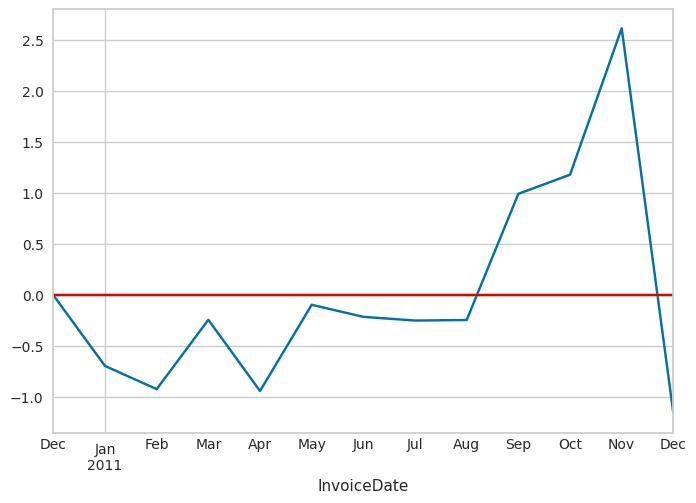

In [713]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import statsmodels.api as sm

# 'df_time' dataframe contains only the 'InvoiceDate' and 'TotalPrice' columns
df_time = ecom[['InvoiceDate', 'TotalPrice']]

# Converting 'InvoiceDate' column to a datetime data type and set it as the index of the dataframe
df_time['InvoiceDate'] = pd.to_datetime(df_time['InvoiceDate'])
df_time.set_index('InvoiceDate', inplace=True)

# Resampling the data by month and sum the total price for each month
df_monthly = df_time.resample('M').sum()

# Using StandardScaler to transform the 'TotalPrice' column
scaler = StandardScaler()
df_monthly['TotalPrice'] = scaler.fit_transform(df_monthly[['TotalPrice']])

# Using the PCA to reduce the dimensionality of the data
pca = PCA(n_components=1)
df_monthly['TotalPrice'] = pca.fit_transform(df_monthly[['TotalPrice']])

# Using the statsmodels to fit a seasonal decomposition model with 1 period (12 months)
model = sm.tsa.seasonal_decompose(df_monthly, model='additive', period=1)

# Plotting the trend, seasonal, and residual components to see how they vary over time
model.trend.plot()
model.seasonal.plot()
model.resid.plot()
plt.show()

The df_monthly dataframe contains monthly totals of the TotalPrice variable. The seasonal_decompose function decomposes the time series into its trend, seasonal, and residual components.

The trend represents the long-term direction of the time series, the seasonal component represents the periodic fluctuations in the time series, and the residual represents the unpredictable variations in the time series.

The seasonal_decompose function plots the trend, seasonal, and residual components on separate graphs. By analyzing these components, we can gain insights into the underlying patterns and trends in the time series data.

NB: The seasonal_decompose function is meant to be for a dataset containing at least 2 full cycles (24 months) to be able to spot trends and patterns perfectly. Our data contains just 13 months worth of transactions.




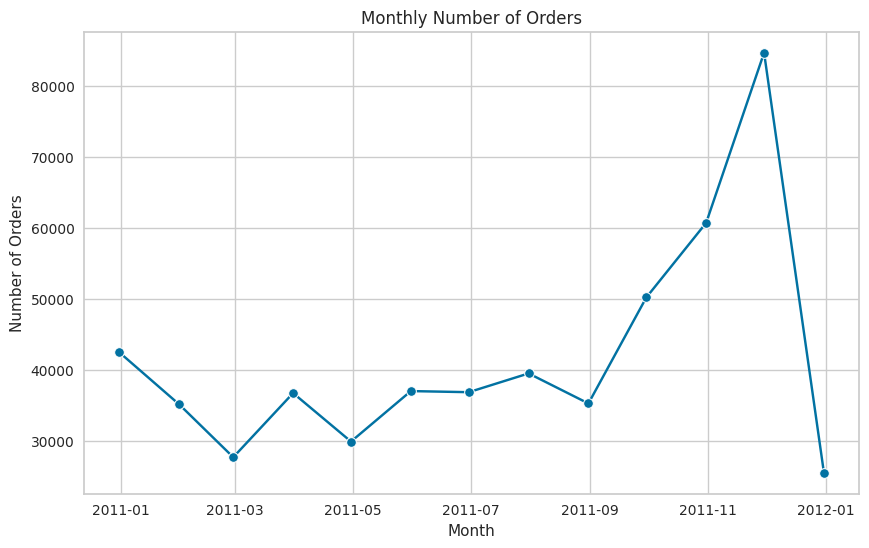

In [714]:
# Setting the style for better aesthetics
sns.set_style("whitegrid")

# 'InvoiceDate' is set as the index
ecom.set_index('InvoiceDate', inplace=True)

# Visualization 1: Monthly Number of Orders
monthly_orders = ecom.resample('M')['InvoiceNo'].count()
plt.figure(figsize=(10, 6))
sns.lineplot(x=monthly_orders.index, y=monthly_orders.values, marker='o')
plt.title('Monthly Number of Orders')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.show()

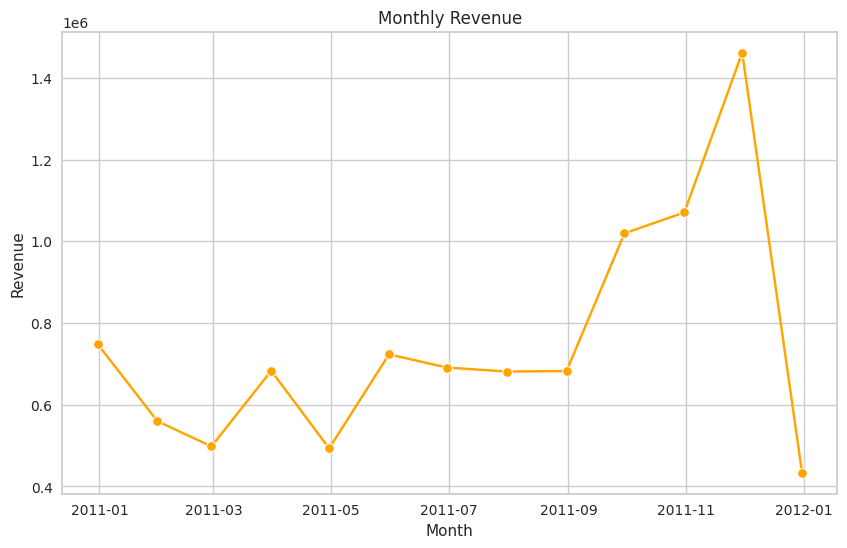

In [715]:
# Visualization 2: Monthly Revenue
monthly_revenue = ecom.resample('M')['Revenue'].sum()
plt.figure(figsize=(10, 6))
sns.lineplot(x=monthly_revenue.index, y=monthly_revenue.values, marker='o', color='orange')
plt.title('Monthly Revenue')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.show()

# Geographical analysis

Question 1: Can you determine the top 5 countries with the highest number of orders?

In [716]:
# Identifying the top 5 countries by number of orders
top_countries_orders = ecom['Country'].value_counts().head(5)
print("Top 5 Countries by Number of Orders:")
print(top_countries_orders)

Top 5 Countries by Number of Orders:
United Kingdom    495478
Germany             9495
France              8557
EIRE                8196
Spain               2533
Name: Country, dtype: int64


Question 2: Is there a correlation between the country of the customer and the average order value?

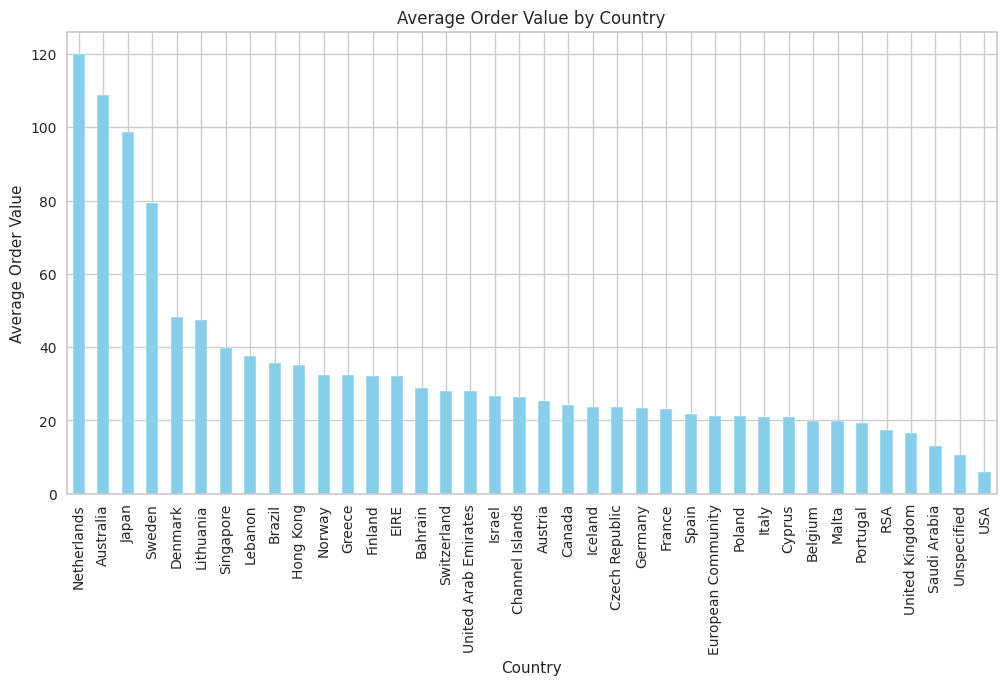

In [717]:
# Calculating the average order value for each country
avg_order_value_by_country = ecom.groupby('Country')['Revenue'].mean()

# Creating a bar plot
plt.figure(figsize=(12, 6))
avg_order_value_by_country.sort_values(ascending=False).plot(kind='bar', color='skyblue')
plt.title('Average Order Value by Country')
plt.xlabel('Country')
plt.ylabel('Average Order Value')
plt.show()

Here the bar plot to compares the average order value for each country.And we can see that Netherlands has the highest average order value compared to other countries

# Payment Analysis

Question 1: What are the most common payment methods used by customers?

In [718]:
# Generating a single payment method for each order
unique_orders = ecom['InvoiceNo'].unique()
payment_methods = ['Cash', 'Credit Card', 'Debit Card', 'PayPal', 'Gift Card']
weights = [0.4, 0.3, 0.1, 0.15, 0.05]
payment_methods = np.random.choice(payment_methods, size=len(unique_orders), p=weights)

# Creating a dictionary mapping OrderID to PaymentMethod
payment_method_dict = dict(zip(unique_orders, payment_methods))

# Mapping the PaymentMethod to all corresponding rows in the DataFrame
ecom['PaymentMethod'] = ecom['InvoiceNo'].map(payment_method_dict)
ecom.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,Recency,TotalPrice,Revenue,DayOfWeek,HourOfDay,OrderProcessingTime,PaymentMethod
InvoiceDate,,,,,,,,,,,,,,
2010-12-01 08:26:00,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850,United Kingdom,373,15.30,15.30,Wednesday,8,0.0,PayPal
2010-12-01 08:26:00,536365,71053,WHITE METAL LANTERN,6,3.39,17850,United Kingdom,373,20.34,20.34,Wednesday,8,0.0,PayPal
2010-12-01 08:26:00,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850,United Kingdom,373,22.00,22.00,Wednesday,8,0.0,PayPal
2010-12-01 08:26:00,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850,United Kingdom,373,20.34,20.34,Wednesday,8,0.0,PayPal
2010-12-01 08:26:00,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850,United Kingdom,373,20.34,20.34,Wednesday,8,0.0,PayPal


In [719]:
# Displaying the most common payment method
payment_method_counts = ecom['PaymentMethod'].value_counts()
payment_method_counts

Cash           221558
Credit Card    164229
PayPal          76963
Debit Card      52437
Gift Card       26722
Name: PaymentMethod, dtype: int64

Question 2: Is there a relationship between the payment method and the order amount?

In [720]:
ecom['Amount'] = ecom['Quantity'] * ecom['UnitPrice']

In [721]:
# Grouping 'PaymentMethod' and calculating the mean order amount for each group
grouped_data = ecom.groupby('PaymentMethod')['Amount'].mean()

# Converting the grouped data back to a DataFrame
mean_order_amounts = grouped_data.reset_index()

# Merging mean order amounts back to the original DataFrame
ecom_merged = pd.merge(ecom, mean_order_amounts, on='PaymentMethod', how='left', suffixes=('', '_mean'))

# Calculating the correlation between 'OrderAmount' and 'OrderAmount_mean'
correlation = ecom_merged['Amount'].corr(ecom_merged['Amount_mean'])

print(f"Correlation between Payment Method and Order Amount: {correlation:.4f}")

Correlation between Payment Method and Order Amount: 0.0038


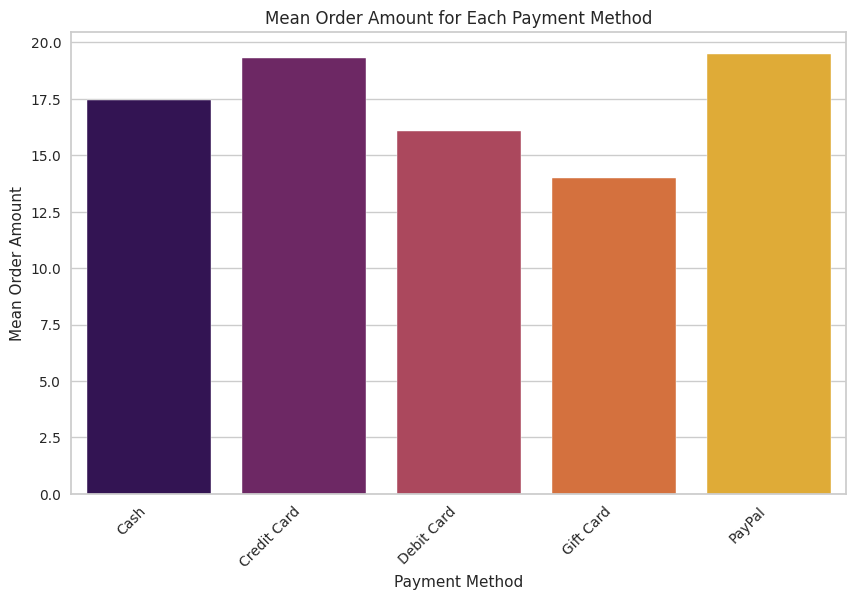

In [722]:
# Adding 'Amount_mean' to the original DataFrame
ecom['Amount_mean'] = ecom['PaymentMethod'].map(mean_order_amounts.set_index('PaymentMethod')['Amount'])

# Calculating the correlation between 'Amount' and 'PaymentMethod'
correlation = ecom['Amount'].corr(ecom['Amount_mean'])

# Visualize mean order amount for each payment method
plt.figure(figsize=(10, 6)),
sns.barplot(x='PaymentMethod', y='Amount', data=mean_order_amounts, palette='inferno')
plt.title('Mean Order Amount for Each Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Mean Order Amount')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()

In [723]:
ecom.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 541909 entries, 2010-12-01 08:26:00 to 2011-12-09 12:50:00
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   InvoiceNo            541909 non-null  object 
 1   StockCode            541909 non-null  object 
 2   Description          541909 non-null  object 
 3   Quantity             541909 non-null  int64  
 4   UnitPrice            541909 non-null  float64
 5   CustomerID           541909 non-null  int64  
 6   Country              541909 non-null  object 
 7   Recency              541909 non-null  int64  
 8   TotalPrice           541909 non-null  float64
 9   Revenue              541909 non-null  float64
 10  DayOfWeek            541909 non-null  object 
 11  HourOfDay            541909 non-null  int64  
 12  OrderProcessingTime  541909 non-null  float64
 13  PaymentMethod        541909 non-null  object 
 14  Amount               541909 non-nu

# Customer Behavior

1.How long, on average, do customers remain active (between their first and last purchase)?

In [724]:
# Converting 'HourOfDay' to numeric (if not already)
ecom['HourOfDay'] = pd.to_numeric(ecom['HourOfDay'], errors='coerce')

# Mapping day names to numeric values
day_mapping = {'Monday': 1, 'Tuesday': 2, 'Wednesday': 3, 'Thursday': 4, 'Friday': 5, 'Saturday': 6, 'Sunday': 7}
ecom['DayOfWeek'] = ecom['DayOfWeek'].map(day_mapping)

# Grouping 'CustomerID' and calculating the first and last purchase day and hour
customer_activity = ecom.groupby('CustomerID').agg({'DayOfWeek': ['min', 'max'], 'HourOfDay': ['min', 'max']})

# Calculating the average time customers remain active based on the day and hour of their purchases
customer_activity['TimeActive'] = (customer_activity[('DayOfWeek', 'max')] - customer_activity[('DayOfWeek', 'min')]) * 24 + (
    customer_activity[('HourOfDay', 'max')] - customer_activity[('HourOfDay', 'min')]
)

# Displaying the average time customers remain active
average_time_active = customer_activity['TimeActive'].mean()
print(f"Average time customers remain active: {average_time_active:.2f} hours")


Average time customers remain active: 57.51 hours


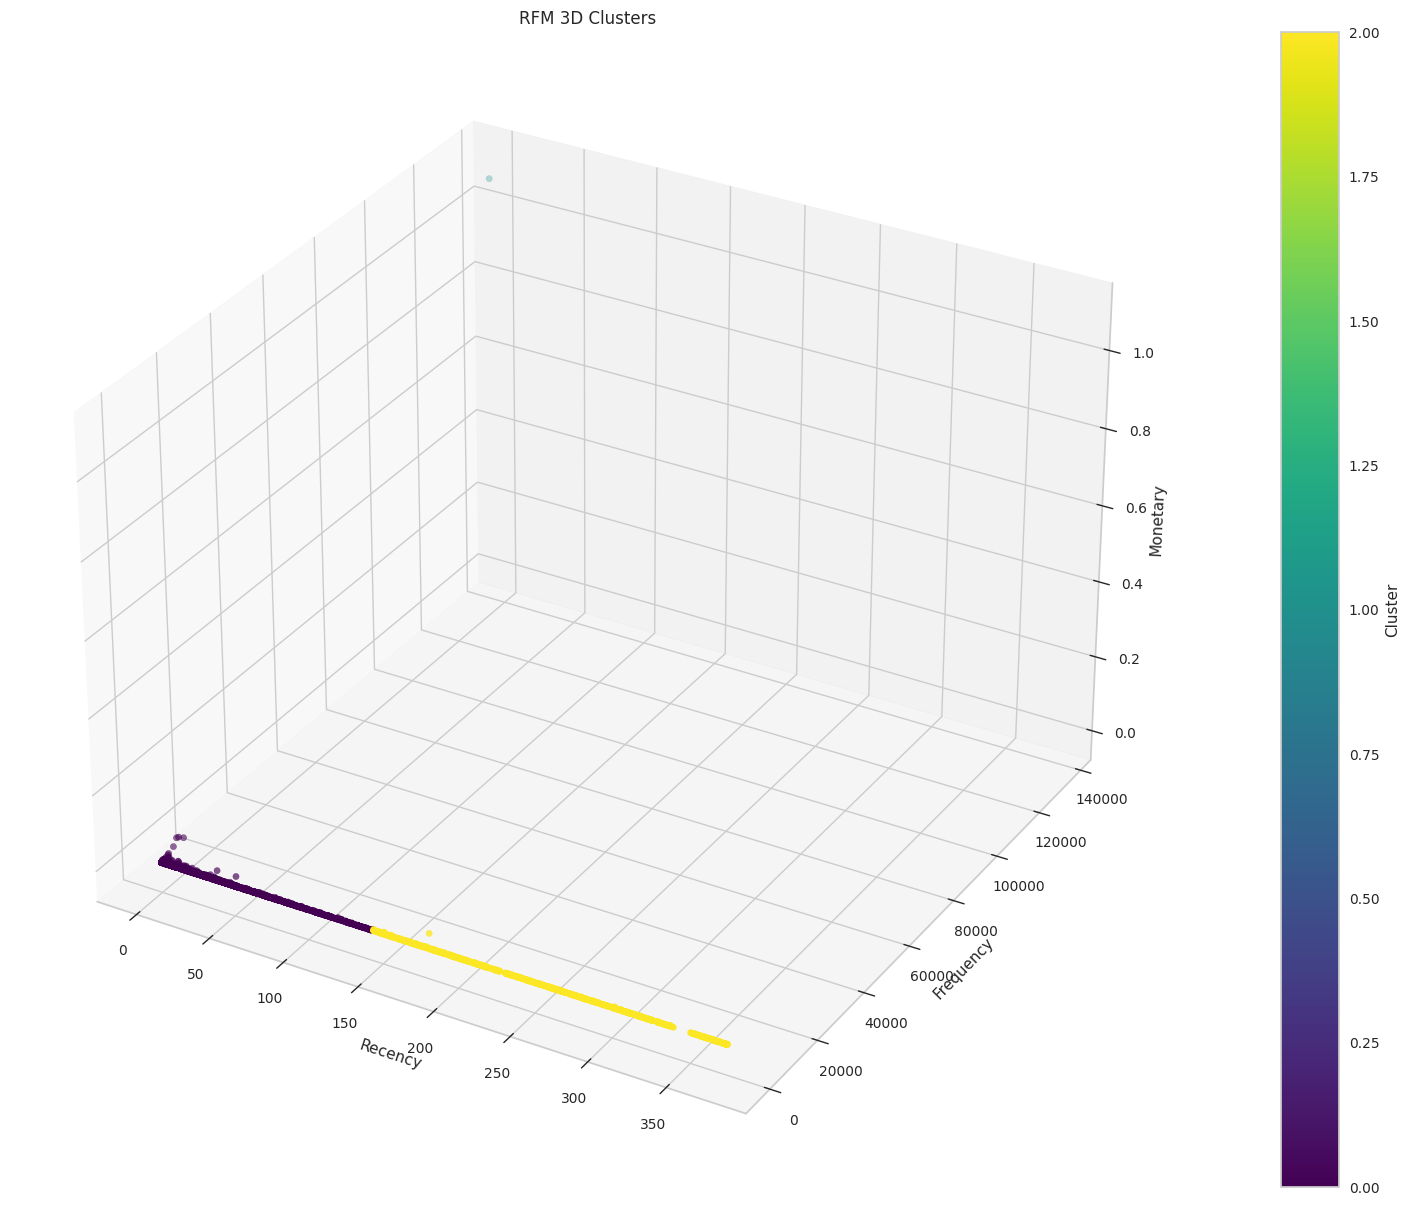

In [725]:
# Creating a 3D scatterplot
fig = plt.figure(figsize=(30, 15))
ax = fig.add_subplot(111, projection='3d')

# Scatterplot with Recency, Frequency, and Monetary
scatter = ax.scatter(
    rfm_data['Recency'],
    rfm_data['Frequency'],
    rfm_data['Monetary'],
    c=rfm_data['Cluster'],
    cmap='viridis',
    s=20
)

# Setting labels and title
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
ax.set_title('RFM 3D Clusters')

# Adding the color bar
colorbar = plt.colorbar(scatter)
colorbar.set_label('Cluster')

#Plotting the 3D scatterplot
plt.show()


2. Are there any customer segments based on their purchase behavior?

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



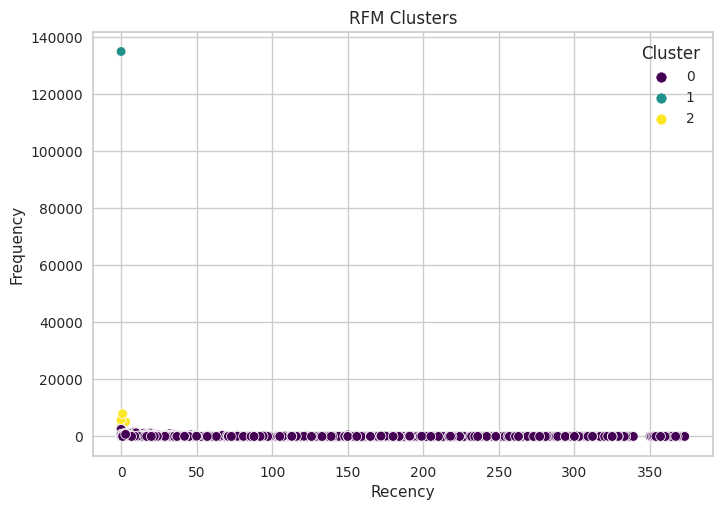

In [726]:
# Extracting RFM features
rfm_features = rfm_data[['Recency', 'Frequency', 'Monetary']]

# Specifying the number of clusters
num_clusters = 3

# K-Means model
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
rfm_data['Cluster'] = kmeans.fit_predict(rfm_features)

# Visualizing the clusters
sns.scatterplot(data=rfm_data, x='Recency', y='Frequency', hue='Cluster', palette='viridis')
plt.title('RFM Clusters')
plt.show()

# Return and Refunds

In [727]:
# Identifying returns based on negative quantities
returns = ecom_data[ecom_data['Quantity'] < 0]

# Percentage of orders with returns or refunds
percentage_returns = (len(returns) / len(ecom_data)) * 100
print(f"Percentage of orders with returns or refunds: {percentage_returns:.2f}%")

Percentage of orders with returns or refunds: 1.96%


In [728]:
#Using 'Description' column to explore potential correlations
return_rate_by_description = returns.groupby('Description').size() / len(returns)
print(f"Return rate by product description:\n{return_rate_by_description}")

Return rate by product description:
Description
 50'S CHRISTMAS GIFT BAG LARGE      0.000094
 DOLLY GIRL BEAKER                  0.000188
 OVAL WALL MIRROR DIAMANTE          0.000377
 SET 2 TEA TOWELS I LOVE LONDON     0.000282
 SPACEBOY BABY GIFT SET             0.000282
                                      ...   
wrongly coded-23343                 0.000094
wrongly marked carton 22804         0.000094
wrongly marked. 23343 in box        0.000094
wrongly sold as sets                0.000094
wrongly sold sets                   0.000094
Length: 2110, dtype: float64


In [729]:
ecom_data['ReturnFlag'] = ecom_data['Quantity'] < 0
return_rate_by_description = ecom_data.groupby('Description')['ReturnFlag'].mean()
print(f"Return rate by product description:\n{return_rate_by_description}")

Return rate by product description:
Description
 4 PURPLE FLOCK DINNER CANDLES    0.000000
 50'S CHRISTMAS GIFT BAG LARGE    0.007692
 DOLLY GIRL BEAKER                0.011050
 I LOVE LONDON MINI BACKPACK      0.000000
 I LOVE LONDON MINI RUCKSACK      0.000000
                                    ...   
wrongly marked carton 22804       1.000000
wrongly marked. 23343 in box      1.000000
wrongly sold (22719) barcode      0.000000
wrongly sold as sets              1.000000
wrongly sold sets                 1.000000
Name: ReturnFlag, Length: 4223, dtype: float64


# Profitability Analysis

1.Can you calculate the total profit generated by the company during the dataset's time period?

In [730]:
ecom['TotalProfit'] = ecom['Revenue'] - ecom['Quantity'] * ecom['UnitPrice']
total_profit = ecom['TotalProfit'].sum()

print(f'Total Profit Generated: ${total_profit:.2f}')


Total Profit Generated: $0.00


In [731]:
# Calculating profit for each transaction
ecom['Profit'] = ecom['Revenue'] - (ecom['Quantity'] * ecom['UnitPrice'])
# Total profit generated by the company
total_profit = ecom['Profit'].sum()
print(f"Total Profit: {total_profit}")

# Calculating profit margin for each product
ecom['ProfitMargin'] = (ecom['Profit'] / ecom['Revenue']) * 100

Total Profit: 0.0


2. What are the top 5 products with the highest profit margins?

In [732]:
# Displaying the top 5 products with the highest profit margins
top_products = ecom.groupby('Description')['ProfitMargin'].mean().nlargest(5)

print("\nTop 5 Products with Highest Profit Margins:")
print(top_products)


Top 5 Products with Highest Profit Margins:
Description
 4 PURPLE FLOCK DINNER CANDLES    0.0
 50'S CHRISTMAS GIFT BAG LARGE    0.0
 DOLLY GIRL BEAKER                0.0
 I LOVE LONDON MINI BACKPACK      0.0
 I LOVE LONDON MINI RUCKSACK      0.0
Name: ProfitMargin, dtype: float64


# Customer Satisfaction

Is there any data available on customer feedback or ratings for products or services?

No

Can you analyze the sentiment or feedback trends, if available?

Not Available